In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [2]:
#for all columns visualization
pd.set_option("display.max_columns", None) 

In [3]:
#let import train and test dataset for pre processing & feature engineering

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
nan_features = [feature for feature in df_train.columns if df_train[feature].isnull().sum()]
nan_features  #features list having nan values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
num_features = [feature for feature in df_train.columns if df_train[feature].dtype !='O']
cat_features = [feature for feature in df_train.columns if df_train[feature].dtype =='O']

In [7]:
#sum of nan in nan_features
df_train[nan_features].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
cat_nan_features = [feature for feature in df_train[nan_features] if df_train[feature].dtype =='O']

In [9]:
num_nan_features = [feature for feature in df_train[nan_features] if df_train[feature].dtype !='O']

In [10]:
num_nan_features

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [11]:
len(cat_nan_features)

16

In [12]:
df_train.shape

(1460, 81)

In [13]:
df_train['LotFrontage'].median()

69.0

In [14]:
df_train.LotFrontage.median()

69.0

Text(0.5, 1.0, 'Histogram of MasVnrArea before imputation')

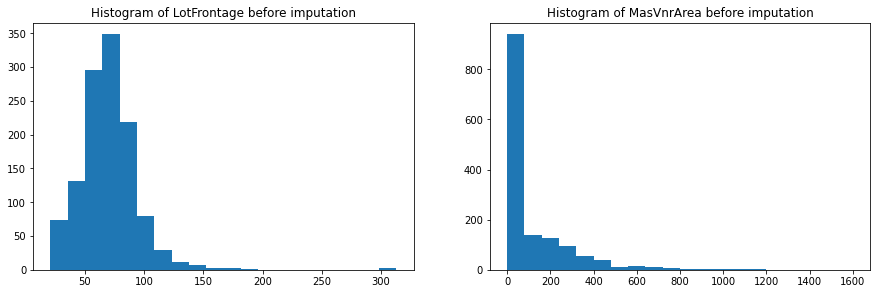

In [15]:
#plotting subplots for num_nan_features before median imputation to see the distribution
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(2,2,1)
plt.hist(df_train['LotFrontage'], bins =20, )  #it is skewed need to be log normalized
plt.title("Histogram of LotFrontage before imputation")

plt.subplot(2,2,2)
plt.hist(df_train['MasVnrArea'], bins =20)  #it is skewed need to be log normalized
plt.title("Histogram of MasVnrArea before imputation")


In [16]:
df_train[num_nan_features].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [17]:
def impute_nan_num(df_train,variable,median):
   
    median=df_train[variable].median()
    df_train[variable+"_median"]=df_train[variable].fillna(median)

In [18]:
impute_nan_num(df_train,'LotFrontage',df_train['LotFrontage'].median())
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_median
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,65.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,80.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,68.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,60.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,84.0


In [19]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [20]:
df_train['LotFrontage'].isnull().sum()

259

In [21]:
df_train['LotFrontage_median'].isnull().sum()

0

In [22]:
#similarly impute median in MasVnrArea and create new feature MasVnrArea_median
impute_nan_num(df_train, 'MasVnrArea', df_train['MasVnrArea'].median())

In [23]:
df_train['MasVnrArea_median'].isnull().sum()

0

Distribution before and after Median imputation


'the median imputation does not give us proper distribution \ndistorted in LotFrontage and skewed as before fot MasVnrArea so lets check Random value imputation'

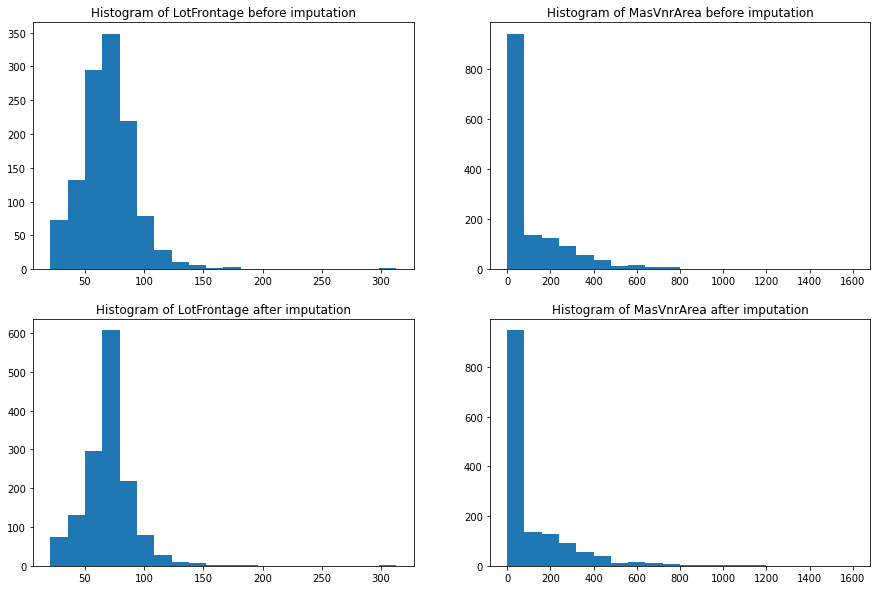

In [24]:
print("Distribution before and after Median imputation")

#plotting subplots for num_nan_features before median imputation to see the distribution
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(2,2,1)
plt.hist(df_train['LotFrontage'], bins =20, )  #it is skewed need to be log normalized
plt.title("Histogram of LotFrontage before imputation")

plt.subplot(2,2,2)
plt.hist(df_train['MasVnrArea'], bins =20)  #it is skewed need to be log normalized
plt.title("Histogram of MasVnrArea before imputation")

#plotting subplots for num_nan_features before median imputation to see the distribution
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(2,2,3)
plt.hist(df_train['LotFrontage_median'], bins =20, )  #it is skewed need to be log normalized
plt.title("Histogram of LotFrontage after imputation")

plt.subplot(2,2,4)
plt.hist(df_train['MasVnrArea_median'], bins =20)  #it is skewed need to be log normalized
plt.title("Histogram of MasVnrArea after imputation")


'''the median imputation does not give us proper distribution 
distorted in LotFrontage and skewed as before fot MasVnrArea so lets check Random value imputation'''

In [25]:
# Random sample imputation note this just for display yet not imputed.
print(df_train['LotFrontage'].dropna().sample(df_train['LotFrontage'].isnull().sum(),random_state=0))
print(df_train['MasVnrArea'].dropna().sample(df_train['MasVnrArea'].isnull().sum(),random_state=0))

242      63.0
400      38.0
54       60.0
316      94.0
748      59.0
        ...  
377     102.0
1279     60.0
1397     51.0
146      51.0
820      72.0
Name: LotFrontage, Length: 259, dtype: float64
1378    408.0
483     116.0
1300    344.0
271       0.0
279     299.0
668       0.0
1017      0.0
1171      0.0
Name: MasVnrArea, dtype: float64


In [26]:
#applying random imputation
def impute_nan_num(df_train,variable): #,median):
    #df[variable+"_median"]=df[variable].fillna(median) if want to do both using single function
    df_train[variable+"_random"]=df_train[variable]
    ##It will have the random sample to fill the na
    random_sample=df_train[variable].dropna().sample(df_train[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df_train[df_train[variable].isnull()].index
    df_train.loc[df_train[variable].isnull(),variable+'_random']=random_sample
for feature in ['LotFrontage', 'MasVnrArea']:
    impute_nan_num(df_train,feature)

In [27]:
print(df_train['MasVnrArea_random'].isnull().sum())
print(df_train['LotFrontage_random'].isnull().sum())

0
0


In [28]:
df_train.shape   #for new features added after modification

(1460, 85)

Distribution before and after Random value imputation


'the median imputation does not give us proper distribution \ndistorted in LotFrontage and skewed as before fot MasVnrArea so lets check Random value imputation'

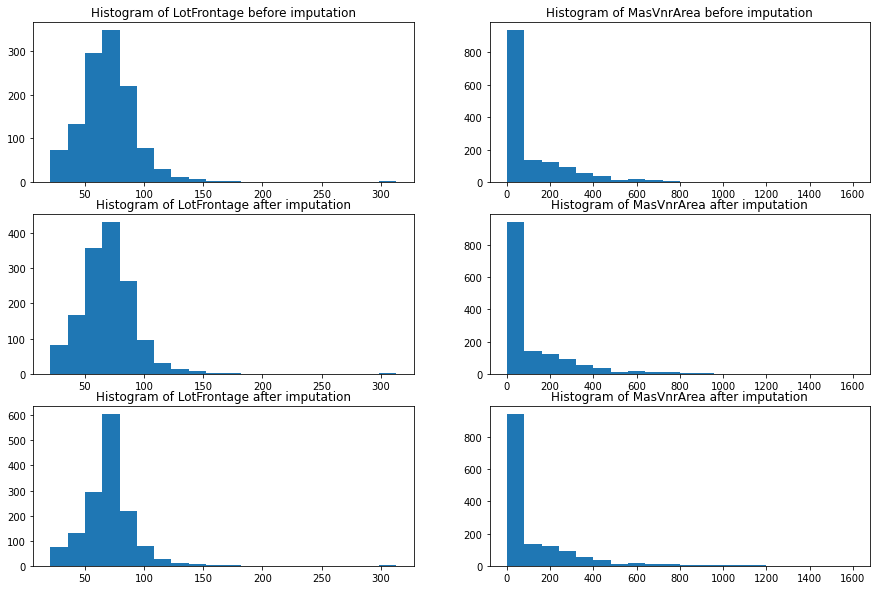

In [29]:
#now check the distribution again 

print("Distribution before and after Random value imputation")

#plotting subplots for num_nan_features before median imputation to see the distribution
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(3,2,1)
plt.hist(df_train['LotFrontage'], bins =20, )  #it is skewed need to be log normalized
plt.title("Histogram of LotFrontage before imputation")

plt.subplot(3,2,2)
plt.hist(df_train['MasVnrArea'], bins =20)  #it is skewed need to be log normalized
plt.title("Histogram of MasVnrArea before imputation")

#plotting subplots for num_nan_features before median imputation to see the distribution
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(3,2,3)
plt.hist(df_train['LotFrontage_random'], bins =20, )  #it is skewed need to be log normalized
plt.title("Histogram of LotFrontage after imputation")

plt.subplot(3,2,4)
plt.hist(df_train['MasVnrArea_random'], bins =20)  #it is skewed need to be log normalized
plt.title("Histogram of MasVnrArea after imputation")

''' random not distorts the Lotfrontage distribution hence we consider this method'''

#plotting subplots for num_nan_features before median imputation to see the distribution
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(3,2,5)
plt.hist(df_train['LotFrontage_median'], bins =20, )  #it is skewed need to be log normalized
plt.title("Histogram of LotFrontage after imputation")

plt.subplot(3,2,6)
plt.hist(df_train['MasVnrArea_median'], bins =20)  #it is skewed need to be log normalized
plt.title("Histogram of MasVnrArea after imputation")


'''the median imputation does not give us proper distribution 
distorted in LotFrontage and skewed as before fot MasVnrArea so lets check Random value imputation'''

In [30]:
#handling Year features
year_features = [feature for feature in num_features if 'Yr' in feature or 'Year' in feature]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [34]:
for feature in year_features: 
    if year_features != 'YrSold':
        df_train[feature]=df_train['YrSold'] - df_train[feature]

In [38]:
new_df=pd.read_csv('train.csv', usecols=['YrSold']) #just to replace yrsold mistakenly modified

In [40]:
df_train[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2007
1,31,31,31.0,2008
2,7,6,7.0,2006
3,91,36,8.0,2008
4,8,8,8.0,2009


In [39]:

df_train['YrSold']=df_train.replace(new_df['YrSold'])

In [41]:
#replacing yr sold by the differnce of current year 2021

df_train['YrSold']=2021- df_train['YrSold']

In [43]:
df_train[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,14
1,31,31,31.0,13
2,7,6,7.0,15
3,91,36,8.0,13
4,8,8,8.0,12


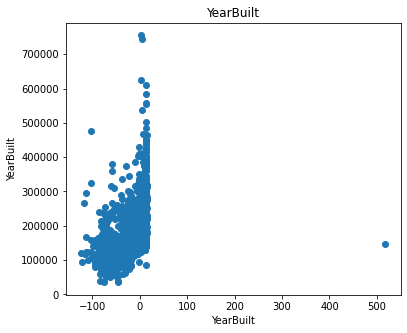

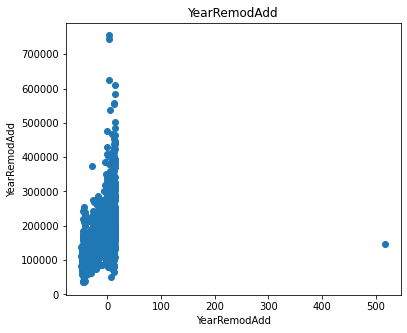

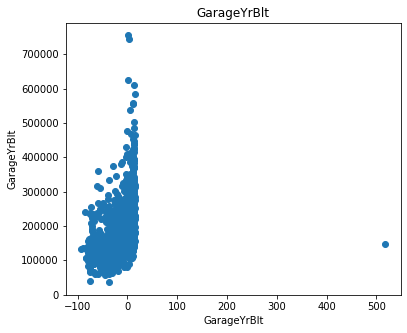

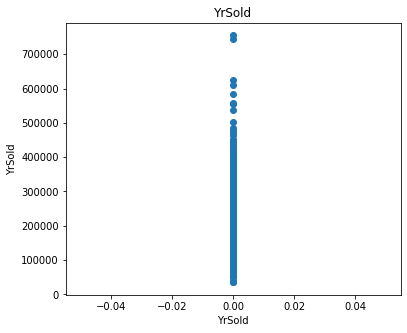

In [44]:
for feature in year_features:
    if year_features != 'YrSold':
        df1=df_train.copy()       #copied to not effect my working dataframe df_train
        df1[feature]=df1['YrSold'] - df1[feature]
        plt.figure(figsize=(6,5))
        plt.scatter(df1[feature], df1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [ ]:
df_train['GarageYrBlt'].isnull().sum()


In [45]:
df_train[year_features].isnull().sum()

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
YrSold           0
dtype: int64

Text(0, 0.5, 'SalePrice')

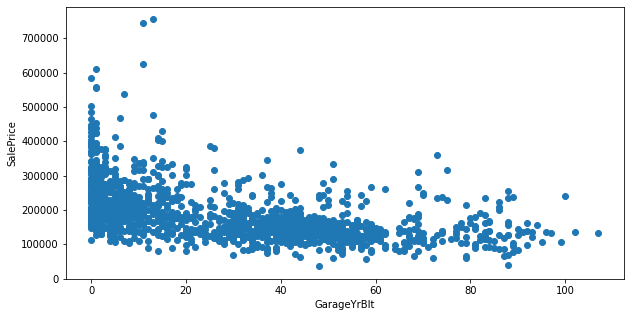

In [46]:
plt.rcParams['figure.figsize']=(10,5)
plt.scatter(x=df_train['GarageYrBlt'], y=df_train['SalePrice'])
plt.xlabel("GarageYrBlt")
plt.ylabel("SalePrice")

In [47]:
print(df_train['GarageYrBlt'].mean())
print(df_train['GarageYrBlt'].median())
print(df_train['GarageYrBlt'].dropna().sample(df_train['GarageYrBlt'].isnull().sum(), random_state=0))
print(df_train[df_train['GarageYrBlt'].isnull()].index)

29.306018854242204
28.0
693     38.0
1028    66.0
471     30.0
919     18.0
906      1.0
        ... 
46       6.0
115      8.0
57       2.0
569     27.0
524     11.0
Name: GarageYrBlt, Length: 81, dtype: float64
Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
             976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
            1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
            1407, 1449, 1450, 1453],
           dtype='int64')


In [48]:
df_train['GarageYrBlt'].isnull()[39] #this shows that at 39 index has nan value

True

In [49]:
#imputing GarageYrBlt in new columns by median and randon value to see effect on saleprice using scatter
def impute_nan_garageyrblt(df_train,variable,median):
    median = df_train['GarageYrBlt'].median()
    df_train[variable+"_median"]=df_train[variable].fillna(median) #if want to do both using single function
    df_train[variable+"_random"]=df_train[variable]
    ##It will have the random sample to fill the na
    random_sample=df_train[variable].dropna().sample(df_train[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df_train[df_train[variable].isnull()].index
    df_train.loc[df_train[variable].isnull(),variable+'_random']=random_sample

In [50]:
impute_nan_garageyrblt(df_train, 'GarageYrBlt', df_train['GarageYrBlt'].median())

In [54]:
df_train['GarageYrBlt_random'].isnull().sum()

0

 Before and After imputation the median and random value for GarageYrBlt feature on saleprice


'both type of imputation are almost same effect on saleprice yet consider random again therefore.'

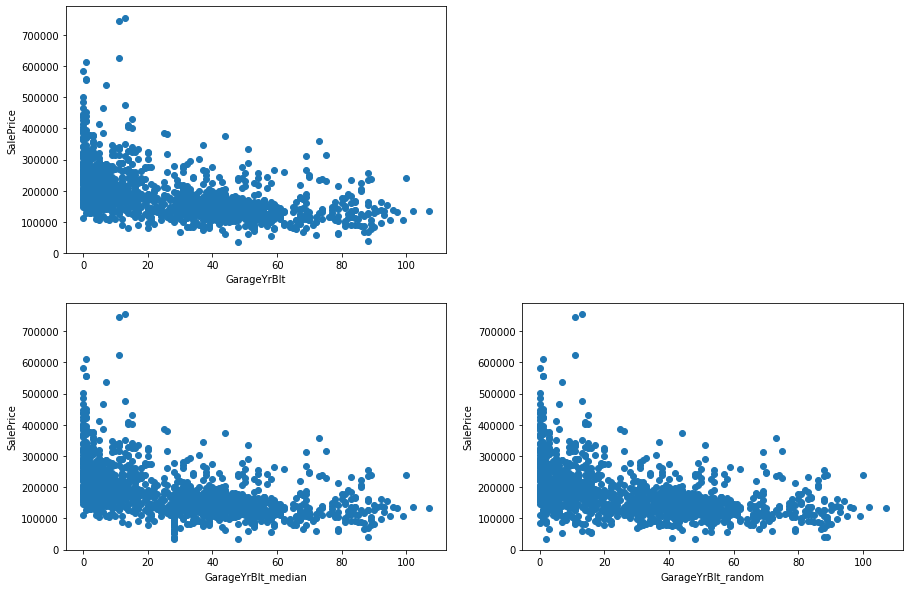

In [55]:
print(" Before and After imputation the median and random value for GarageYrBlt feature on saleprice")
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(2,2,1)
plt.scatter(x=df_train['GarageYrBlt'], y=df_train['SalePrice'])
plt.xlabel("GarageYrBlt")
plt.ylabel("SalePrice")

plt.rcParams['figure.figsize']=(15,10)
plt.subplot(2,2,3)
plt.scatter(x=df_train['GarageYrBlt_median'], y=df_train['SalePrice'])
plt.xlabel("GarageYrBlt_median")
plt.ylabel("SalePrice")

plt.rcParams['figure.figsize']=(15,10)
plt.subplot(2,2,4)
plt.scatter(x=df_train['GarageYrBlt_random'], y=df_train['SalePrice'])
plt.xlabel("GarageYrBlt_random")
plt.ylabel("SalePrice")

'''both type of imputation are almost same effect on saleprice yet consider random again therefore.'''

In [56]:
dfbackup1 = df_train.copy()

# Handling Categorical features 

In [58]:
cat_features = [feature for feature in df_train.columns if df_train[feature].dtype =='O']

In [59]:
df_train[cat_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,14,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,13,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,15,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,13,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,12,WD,Normal


In [60]:
df_train[cat_features].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
YrSold              0
SaleType            0
SaleCondition       0
dtype: int64

In [61]:
cat_nan = [feature for feature in cat_features if df_train[feature].isnull().sum()>0]

In [62]:
cat_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [63]:
df_train.shape

(1460, 87)

In [64]:
df_train[cat_nan].isnull().sum()<100

Alley           False
MasVnrType       True
BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
BsmtFinType2     True
Electrical       True
FireplaceQu     False
GarageType       True
GarageFinish     True
GarageQual       True
GarageCond       True
PoolQC          False
Fence           False
MiscFeature     False
dtype: bool

In [65]:
df_train['BsmtQual'].value_counts()


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [68]:
df_train['BsmtQual'].mode()[0]


'TA'

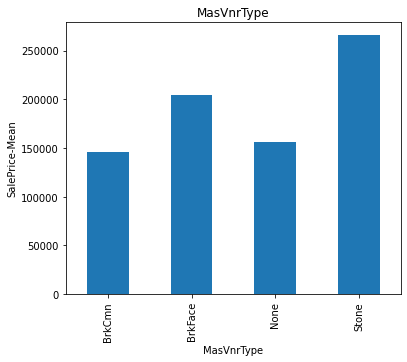

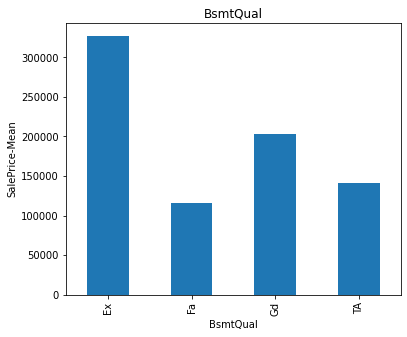

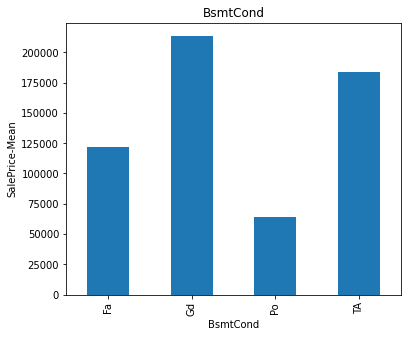

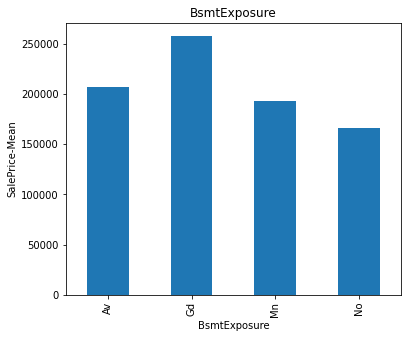

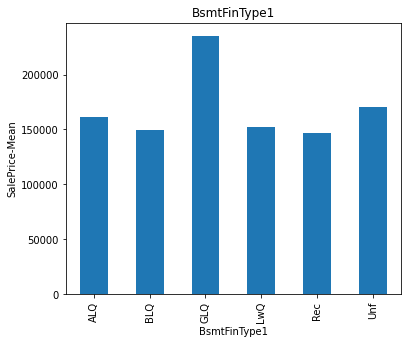

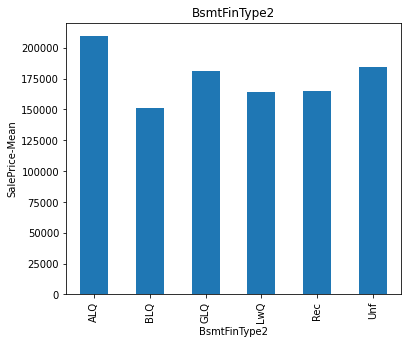

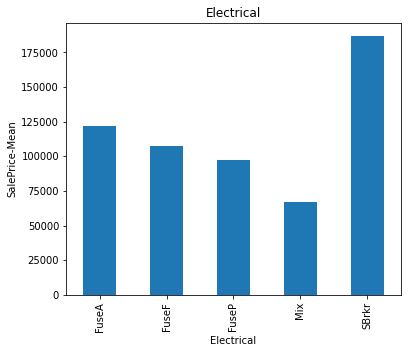

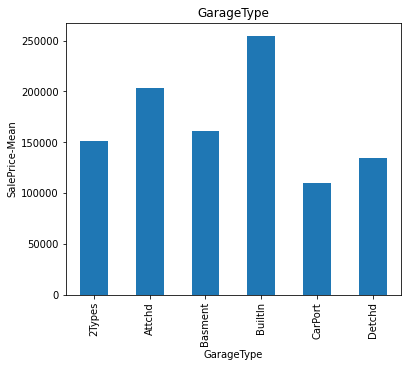

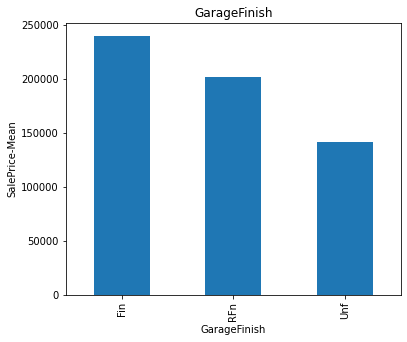

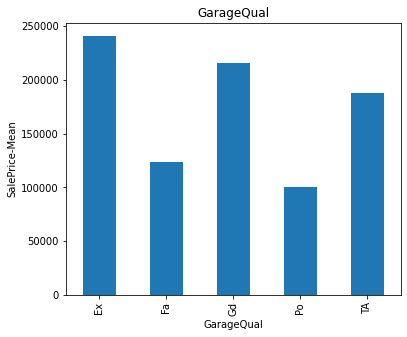

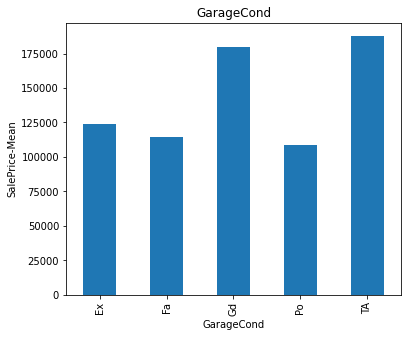

In [69]:
for feature in cat_nan:       #cat_nan are only those which have null values
    if  df_train[feature].isnull().sum() <100:
        df_cat = df_train.copy()
        plt.figure(figsize=(6,5))
        df_cat.groupby(feature)['SalePrice'].mean().plot.bar()
        plt.xlabel(feature)
        plt.ylabel("SalePrice-Mean")
        plt.title(feature)
        plt.show()

In [70]:
#now replacing nan by two approach
#1. replacing with most frequent , where there is small no frequents
#2. replacing with new variable"Missing" or "Others" etc where null counts are high:  Fireplace, pool etc

'''df_train['BsmtQual'] = df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['BsmtCond'] = df_train['BsmtCond'].fillna(df_train['BsmtQual'].mode()[0])
df_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])'''
   



"df_train['BsmtQual'] = df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])\ndf_train['BsmtCond'] = df_train['BsmtCond'].fillna(df_train['BsmtQual'].mode()[0])\ndf_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])\ndf_train['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])\ndf_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])\ndf_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])\ndf_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])"

In [71]:
df_train[cat_nan].isnull().sum()

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

C:\Users\acer\anaconda3\envs\houseprediction\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

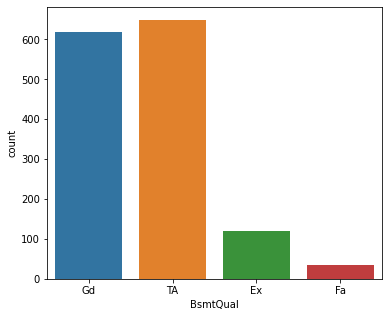

In [72]:
plt.figure(figsize=(6,5))
sns.countplot(df_train['BsmtQual'])

In [73]:
#df_train['GarageType'] = df_train.replace(df2['GarageType'])     #since by mistake wrongly modified

In [74]:
#df_train.loc[df_train.index.isin(df_train1.index), ['Id', 'GarageType']] = df_train1[['Id', 'GarageType']] 
# change columns manipulated by mistake

In [75]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_median,MasVnrArea_median,LotFrontage_random,MasVnrArea_random,GarageYrBlt_median,GarageYrBlt_random
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,8,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,8.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,11,WD,Normal,175000,62.0,0.0,62.0,0.0,8.0,8.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,32,22,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,32.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,11,WD,Normal,210000,85.0,119.0,85.0,119.0,32.0,32.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,69,4,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,69.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,11,WD,Normal,266500,66.0,0.0,66.0,0.0,69.0,69.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,60,14,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,60.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,13,WD,Normal,142125,68.0,0.0,68.0,0.0,60.0,60.0
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,43,43,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,43.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,561,WD,Normal,147500,75.0,0.0,75.0,0.0,43.0,43.0


In [76]:
df_train['SalePrice'].sum()

264144946

In [77]:
df_train.groupby("GarageType")['SalePrice'].sum()

GarageType
2Types        907700
Attchd     176516611
Basment      3050843
BuiltIn     22418153
CarPort       989659
Detchd      51893280
Name: SalePrice, dtype: int64

In [78]:
df_train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [79]:
df_train.groupby("GarageType")['SalePrice'].median()

GarageType
2Types     159000
Attchd     185000
Basment    148000
BuiltIn    227500
CarPort    108000
Detchd     129500
Name: SalePrice, dtype: int64

In [80]:
#replacing cat_nan features whose null count is less than 100 using mode, new column created 
df_cat=df_train.copy()
def impute_nan_cat1(df_train,var,mode):
    mode = df_train[var].mode()[0]
    df_train[var+"mode"]=df_train[var].fillna(mode)
for feature in cat_nan:
    if df_train[feature].isnull().sum()<100:
        impute_nan_cat1(df_train,feature,df_train[feature].mode()[0])   

In [81]:
print(df_train.isnull().sum()==0)

Id                   True
MSSubClass           True
MSZoning             True
LotFrontage         False
LotArea              True
                    ...  
Electricalmode       True
GarageTypemode       True
GarageFinishmode     True
GarageQualmode       True
GarageCondmode       True
Length: 98, dtype: bool


<AxesSubplot:xlabel='GarageType'>

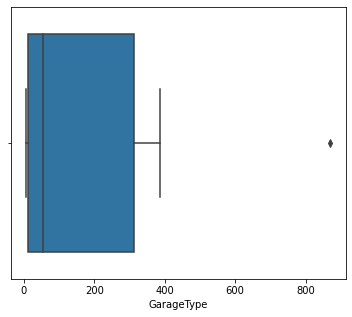

In [82]:
plt.figure(figsize=(6,5))
#figs,axes=plt.subplots(1,1)
sns.boxplot(x=df_train['GarageType'].value_counts())


<AxesSubplot:xlabel='GarageTypemode'>

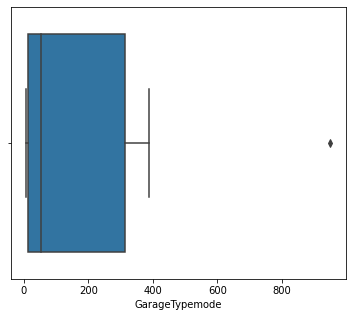

In [83]:
plt.figure(figsize=(6,5))
#figs,axes=plt.subplots(1,1)


sns.boxplot(x=df_train['GarageTypemode'].value_counts())

<AxesSubplot:xlabel='GarageTypemode', ylabel='SalePrice'>

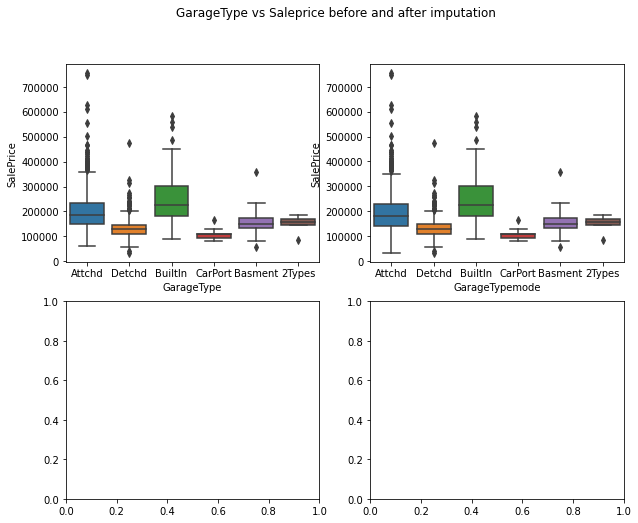

In [84]:
'''#method1 without subplot
plt.figure(figsize=(6,5))
sns.boxplot(x=df_train['GarageType'], y= df_train['SalePrice'])'''

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

fig.suptitle('GarageType vs Saleprice before and after imputation')

sns.boxplot(ax=axes[0, 0], data=df_train, x='GarageType', y='SalePrice')
sns.boxplot(ax=axes[0, 1], data=df_train, x='GarageTypemode', y='SalePrice')


In [85]:
#df_train=df_train.drop(['Alley_newvar','FireplaceQu_newvar','PoolQC_newvar','Fence_newvar', 'MiscFeature_newvar'],axis=1)

In [86]:
#Higher Nan values in count are replace with new var "Missing"

#df_cat2=df_train.copy()
def impute_nan_cat2(df_train,variable):
    
    df_train[variable+"_newvar"]=np.where(df_train[variable].isnull(),"Missing",df_train[variable])
    
for feature in ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']:
    if df_train[feature].isnull().sum()>100:
        impute_nan_cat2(df_train,feature)

In [87]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_median,MasVnrArea_median,LotFrontage_random,MasVnrArea_random,GarageYrBlt_median,GarageYrBlt_random,MasVnrTypemode,BsmtQualmode,BsmtCondmode,BsmtExposuremode,BsmtFinType1mode,BsmtFinType2mode,Electricalmode,GarageTypemode,GarageFinishmode,GarageQualmode,GarageCondmode,Alley_newvar,FireplaceQu_newvar,PoolQC_newvar,Fence_newvar,MiscFeature_newvar
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,14,WD,Normal,208500,65.0,196.0,65.0,196.0,5.0,5.0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,Missing,Missing,Missing,Missing,Missing
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,13,WD,Normal,181500,80.0,0.0,80.0,0.0,31.0,31.0,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA,Missing,TA,Missing,Missing,Missing
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,15,WD,Normal,223500,68.0,162.0,68.0,162.0,7.0,7.0,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,Missing,TA,Missing,Missing,Missing
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,13,WD,Abnorml,140000,60.0,0.0,60.0,0.0,8.0,8.0,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA,Missing,Gd,Missing,Missing,Missing
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,12,WD,Normal,250000,84.0,350.0,84.0,350.0,8.0,8.0,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,Missing,TA,Missing,Missing,Missing


In [88]:
df_train.shape

(1460, 103)

In [89]:
df_train['Alley_newvar'].value_counts()

Missing    1369
Grvl         50
Pave         41
Name: Alley_newvar, dtype: int64

In [90]:
#dropping not req columns (nan)using only modified new columns
df_train.dropna(axis='columns', inplace =True)

#keeping random imputation and droping median columns
df_train.drop(['LotFrontage_median', 'GarageYrBlt_median', 'MasVnrArea_median'], axis =1, inplace =True)  

df_train.shape

(1460, 81)

### Now to convert categorical data into numerical using encoding

In [91]:
df_train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [92]:
#now lets seperate categorical data in form of list from dataset.

s=(df_train.dtypes=='object')
object_cols=list(s[s].index)
print("Categorical variables: {}".format(object_cols))

Categorical variables: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'YrSold', 'SaleType', 'SaleCondition', 'MasVnrTypemode', 'BsmtQualmode', 'BsmtCondmode', 'BsmtExposuremode', 'BsmtFinType1mode', 'BsmtFinType2mode', 'Electricalmode', 'GarageTypemode', 'GarageFinishmode', 'GarageQualmode', 'GarageCondmode', 'Alley_newvar', 'FireplaceQu_newvar', 'PoolQC_newvar', 'Fence_newvar', 'MiscFeature_newvar']


In [94]:
df_train.head()


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_random,MasVnrArea_random,GarageYrBlt_random,MasVnrTypemode,BsmtQualmode,BsmtCondmode,BsmtExposuremode,BsmtFinType1mode,BsmtFinType2mode,Electricalmode,GarageTypemode,GarageFinishmode,GarageQualmode,GarageCondmode,Alley_newvar,FireplaceQu_newvar,PoolQC_newvar,Fence_newvar,MiscFeature_newvar
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,14,WD,Normal,208500,65.0,196.0,5.0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,Missing,Missing,Missing,Missing,Missing
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,13,WD,Normal,181500,80.0,0.0,31.0,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA,Missing,TA,Missing,Missing,Missing
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,15,WD,Normal,223500,68.0,162.0,7.0,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,Missing,TA,Missing,Missing,Missing
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,13,WD,Abnorml,140000,60.0,0.0,8.0,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA,Missing,Gd,Missing,Missing,Missing
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,12,WD,Normal,250000,84.0,350.0,8.0,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,Missing,TA,Missing,Missing,Missing


In [113]:
for feature in object_cols:
    print("{}: unique vales are: {} and no. are: {}" .format(feature,df_train[feature].unique(), 
                                                             len(df_train[feature].unique())))
    
    #this is used to check which kind of encoding can be applied to features

MSZoning: unique vales are: ['RL' 'RM' 'C (all)' 'FV' 'RH'] and no. are: 5
Street: unique vales are: ['Pave' 'Grvl'] and no. are: 2
LotShape: unique vales are: ['Reg' 'IR1' 'IR2' 'IR3'] and no. are: 4
LandContour: unique vales are: ['Lvl' 'Bnk' 'Low' 'HLS'] and no. are: 4
Utilities: unique vales are: ['AllPub' 'NoSeWa'] and no. are: 2
LotConfig: unique vales are: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] and no. are: 5
LandSlope: unique vales are: ['Gtl' 'Mod' 'Sev'] and no. are: 3
Neighborhood: unique vales are: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] and no. are: 25
Condition1: unique vales are: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] and no. are: 9
Condition2: unique vales are: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] and no. are: 8


In [114]:
for feature in object_cols:
    print("{} Value Counts: {}" .format(feature,df_train[feature].value_counts())) 
                                                             
#this to check the if counts are same for some categories type , Neighbourhood feature two category has same count 25
#so we neither use frequecy count encoding nor one hot.

MSZoning Value Counts: RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street Value Counts: Pave    1454
Grvl       6
Name: Street, dtype: int64
LotShape Value Counts: Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour Value Counts: Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities Value Counts: AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig Value Counts: Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope Value Counts: Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood Value Counts: NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SW

In [116]:
#saving this file as a csv for backup
#df_train.to_csv('dfbackup.csv', index = False)

### we make copy of this to apply various algorithm and feature scaling(if req) and handling skew ness in numerical data.

In [117]:
df_train.shape

(1460, 81)